# Prosper Loan Data Exploration
## by Hao Xu

## Preliminary Wrangling


This document explores **Prosper Loan Dataset**. Prosper is America's first peer-to-peer lending company. Before exploration, I think there are two important things need to pay much attation:
1. Prosper stoped its business in 2008, and reopened their business after having obtained SEC registration for its loans on July 13 2009.
2. After Prosper's reopening, lenders simply choose whether or not to invest at the rate which Prosper's loan pricing algorithm assigns to the loan after it analyzes the borrower's credit report and financial information(no longer determine the loan rate via price discovery in an auction).

(Reference Wikipedia)

[参考](https://rpubs.com/bboylowye/282962)

In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [102]:
# load in the dataset into a pandas dataframe
# High-level overview of data shape and composition
df = pd.read_csv('prosperLoanData.csv')
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# see the data type
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [4]:
# descriptive statistics for numeric variables
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [103]:
# change the datatype of ListingCreationDate to timestamp
#df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df["ListingCreationDate"] = df["ListingCreationDate"].astype("datetime64")
# df2 = df[df['ListingCreationDate']>= pd.Timestamp(2009,7,13)]

In [104]:
# set a function to convert columns(with null values) from float datatype to string
def float_to_str(df,col):
    '''
    INPUT:
    df - the pandas dataframe
    col - the column name to convert
    
    OUTPUT:
    str_col - column series with datatype of string
    '''
    def tail(str):
        if str == 'nan':
            return np.NaN
        else:
            return str[:-2]

    new_series = df[col].astype(str).apply(tail)
    
    return new_series


In [105]:
# convert datatype of ProsperRating (numeric), ProsperScore to string use float_to_str function
df['ProsperRating (numeric)'] = float_to_str(df,'ProsperRating (numeric)')
df['ProsperScore']= float_to_str(df,'ProsperScore')


In [106]:
# convert ProsperRating (numeric) ProsperRating (Alpha) ProsperScore into ordered categorical types
ordinal_var_dict = {'ProsperRating (numeric)': ['1','2','3','4','5','6','7'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': ['1', '2', '3', '4', '5', '6', '7', '8','9','10','11']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)
    

In [107]:
# convert ListingCategory to string
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].astype(str)

# get a dictionary of number and content
order_list = [str(i) for i in range(21)]
category_list = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan',
                'Student Use','Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring',
                'Green Loans','Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV',
                'Taxes','Vacation','Wedding Loans']
category_dict = dict(zip(order_list,category_list))

# set a function to change order number to content
def to_content(order):
    try:
        a = category_dict[order]
        return a
    except:
        return None

# change the column value to the text    
df['ListingCategory (numeric)'] = df['ListingCategory (numeric)'].apply(to_content)



In [70]:
df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory (numeric), dtype: int64

In [108]:
# check the result
df[['ListingCreationDate','ProsperRating (numeric)','ProsperRating (Alpha)',\
    'ProsperScore','ListingCategory (numeric)']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
ListingCreationDate          113937 non-null datetime64[ns]
ProsperRating (numeric)      84853 non-null category
ProsperRating (Alpha)        84853 non-null category
ProsperScore                 84853 non-null category
ListingCategory (numeric)    113937 non-null object
dtypes: category(3), datetime64[ns](1), object(1)
memory usage: 2.1+ MB


### What is the structure of your dataset?

There are 113,937 records in the dataset with 81 features. Most variables are numeric in nature, because there are many null value, most of these numeric columns have a float datatype. The variables ProsperRating (numeric),ProsperRating (Alpha) and ProsperScore are ordered factor variables with the following levels.

(lowest) ——> (highest) 
- ProsperRating (numeric): '1','2','3','4','5','6','7',
- ProsperRating (Alpha): 'HR', 'E', 'D', 'C', 'B', 'A', 'AA',
- ProsperScore': '1', '2', '3', '4', '5', '6', '7', '8','9','10','11'

### What is/are the main feature(s) of interest in your dataset?

I am most interested in after Prosper using a new loan pricing algorithm, the borrower rate is affected by what features. And what kind of borrower can not get a loan.

(Many borrowers who received loans prior to 2009 (which were priced by investors) would no longer qualify for a loan, at any rate, under Prosper's new underwriting policies)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

This data set has so much information, I think all 81 features can be devided into 3 sets:
- Basic features of the loan: time, term, amount, status, rate, estimate return, category and so on;
- Pre-loan management features: borrower credit, income, loan history and so on;
- Post-loan management features: principle outstanding/loss, default, fee and so on.

I want to see how Prosper price its loan, I just need the features from the first two sets.

Base on the tradeoff between risk and gain, I expect that amount&term&use of the loan  and features about borrower's ability to repay will have the strongest effect on the borrower rate. The () the term and the () the amount, the lower the interest rate. Besides, the strong the ability of the borrower to repay(), the lower the interest rate. 

Besides, the borrower's willingness to repay(), the borrower's history of repayment() also affect the rate.


ListingCreationDate
CreditGrade
Term(12,36,60 months)
BorrowerAPR
EstimatedLoss
ProsperRating (Alpha)(to categorical data type)
ProsperScore
ListingCategory
BorrowerState
Occupation
EmploymentStatus
IsBorrowerHomeowner
CreditScoreRangeLower
CreditScoreRangeUpper
OpenCreditLines
TotalInquiries
CurrentDelinquencies
AmountDelinquent
BankcardUtilization
AvailableBankcardCredit
DebtToIncomeRatio
IncomeRange
LoanOriginalAmount
Recommendations

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR

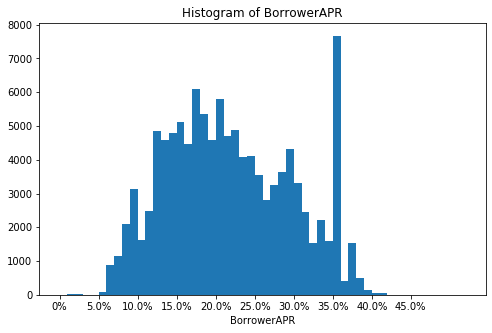

In [11]:
# start with a standard-scaled plot
bins = np.arange(0, df['BorrowerAPR'].max()+0.01, 0.01)
ticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
labels = ['{}%'.format(v*100) for v in ticks]
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR',bins = bins)
plt.xlabel('BorrowerAPR')
plt.xticks(ticks, labels, )
plt.title('Histogram of BorrowerAPR')
plt.show()

The distribution of brrower APR is roughly unimodal with the peak around 18% APR, and is a bit right skewed. There also are two small peaks near 8% and 30%, and a single but very large spike near 35%.

Next, I want to see the characters of some basic aspect of loan(Term, ListingCreationDate, LoanOriginalAmount )

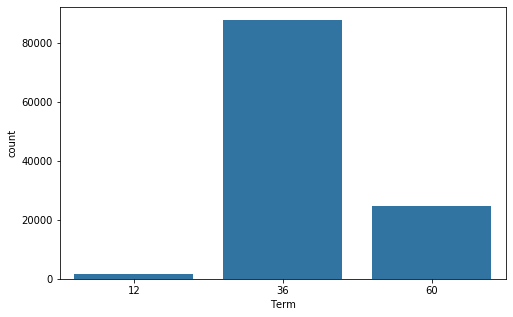

In [49]:
# plot Term with a standard-scaled plot
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'Term',color = base_color)
plt.show()


Most of the loans have the term of 3 years.

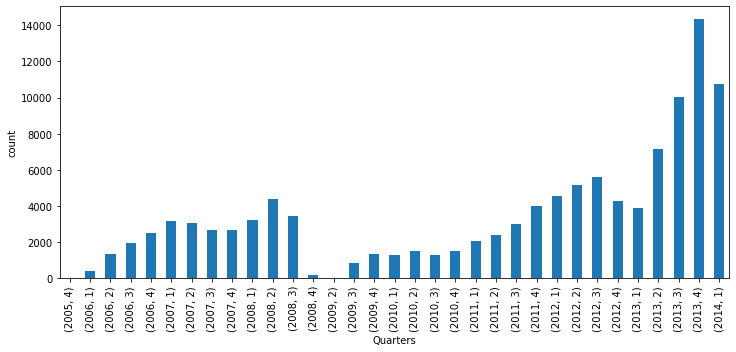

In [51]:
# plot the quarterly time distribution of loans
plt.figure(figsize=[12, 5])
df.groupby([df["ListingCreationDate"].dt.year,df["ListingCreationDate"].dt.quarter]).count()['Term'].plot(kind = 'bar')
plt.xlabel('Quarters')
plt.ylabel('count')
plt.show()


The count of loans in each quarter can be divided into two sections: from the Q4 2005 to Q3 2008, and from Q3 2009 to Q1 2014. Within each section, the count keep increasing overtime(Q4 2012 and Q1 2013 have a bit decrise). From Q4 2008 to Q3 2009, there is a gap, maybe that's because Prosper pause its business according to SEC's requests.

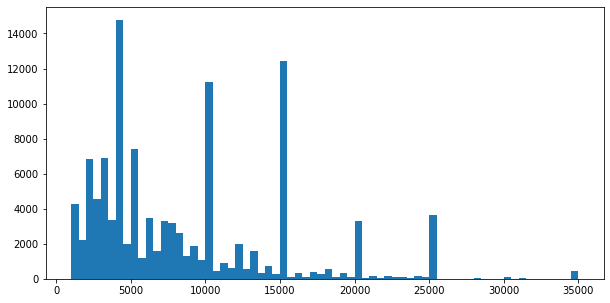

In [85]:
# standard plot of loan amount
plt.figure(figsize=[10, 5])
bins = np.arange(1000, df.LoanOriginalAmount.max()+500, 500)
plt.hist(data = df, x = 'LoanOriginalAmount',bins = bins)
plt.show()


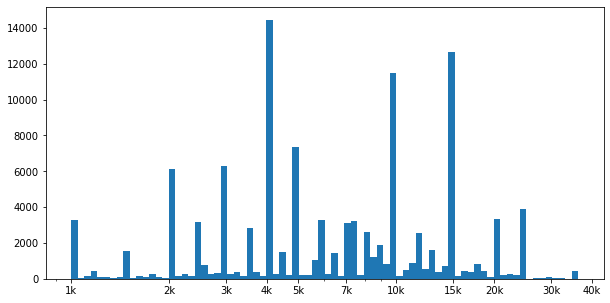

In [86]:
# there's a long tail in the distribution, I polt a log scale as addition
plt.figure(figsize=[10, 5])
ticks = [1000,2000,3000,4000,5000,7000,10000,15000,20000,30000,40000]
labels = ['1k','2k','3k','4k','5k','7k','10k','15k','20k','30k','40k']
bins = 10 ** np.arange(3, np.log10(df.LoanOriginalAmount.max())+0.02, 0.02)
plt.hist(data = df, x = 'LoanOriginalAmount',bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.show()

The distribute of amount has a long tail on the right side with several very high spikes. It shows that most of the loans have a amount less than 10k, but at 15k, 20k and 25k there are a bit more counts. After ploted on a log-scale, I can see more clearly, the amount of most loans are multiples of 500, the most favorite amounts are  4k, 15k and 10k.

In [92]:
# I want to plot credit score related columns(Prosper Rating,Prosper Score and CreditScoreRange)
# First see what's the difference of CreditScoreRangeLower and CreditScoreRangeUpper
(df['CreditScoreRangeLower'] - df['CreditScoreRangeUpper']).value_counts()

-19.0    113346
dtype: int64

I can see every pair of lower and upper credit score have a differ of 19, so I only need to choose lower boundary to plot。

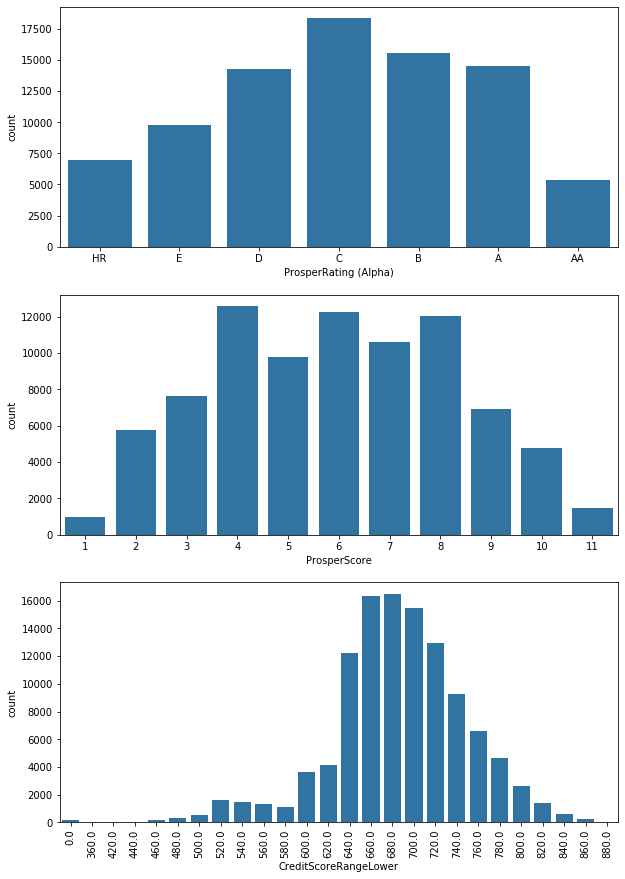

In [109]:
# plot all three credit related columns together(ProsperRating,ProsperScore and CreditScoreRangeLower).
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,15])

plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)',color = base_color)

plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'ProsperScore',color = base_color)

plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'CreditScoreRangeLower',color = base_color)
plt.xticks(rotation = 90)
plt.show()


All three plots are roughly unimodal, and all roughly normal distributed. They show that, people with middle level credit (prosper rating C, prosper score from 4 to 8  or creditscore from 660 to 700) have the hightest number of loans.

In [114]:
df.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

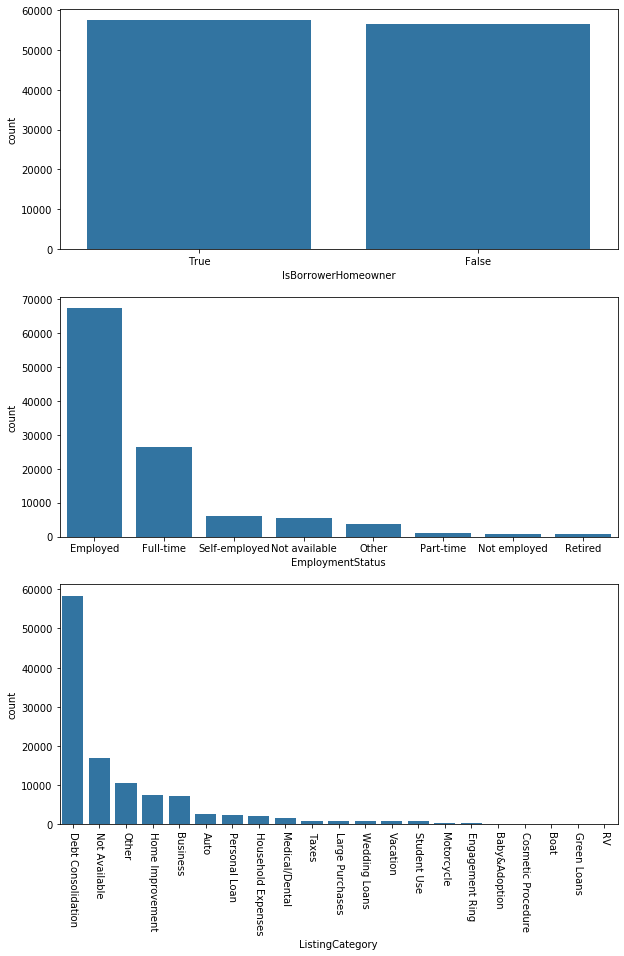

In [220]:
# plot the count of homeowner, employmentstatus and job category
plt.figure(figsize = [10,15])
base_color = sb.color_palette()[0]

plt.subplot(3, 1, 1)
category_order1 = df['IsBorrowerHomeowner'].value_counts().index
sb.countplot(data = df, x = 'IsBorrowerHomeowner',color = base_color, order = category_order1)

plt.subplot(3, 1, 2)
category_order2 = df['EmploymentStatus'].value_counts().index
sb.countplot(data = df, x = 'EmploymentStatus',color = base_color, order = category_order2)

plt.subplot(3, 1, 3)
category_order3 = df['ListingCategory (numeric)'].value_counts().index
sb.countplot(data = df, x = 'ListingCategory (numeric)',color = base_color, order = category_order3)
plt.xticks(rotation = 270)
plt.xlabel('ListingCategory')

plt.show()


Wether the borrower is a homeowner does not obviously effect the number of loans. 

Most of the loans are given to those with a job.

Borrowed money are mainly used for debt consolidation, then used for home imporvement and business.

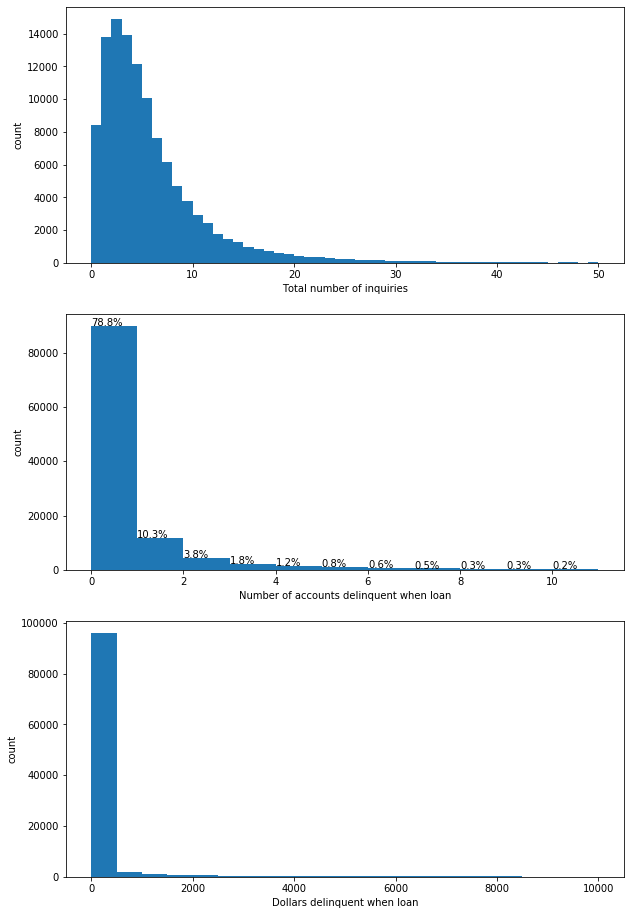

In [252]:
# plot totalinquiries,currentlinquiries,amountlinquiries
plt.figure(figsize = [10,16])
base_color = sb.color_palette()[0]

plt.subplot(3, 1, 1)
bins = np.arange(0,50+1,1)
plt.hist(data = df, x = 'TotalInquiries',color = base_color,bins = bins)
plt.xlim = (0,100)
plt.xlabel('Total number of inquiries')
plt.ylabel('count')

plt.subplot(3, 1, 2)
bins = np.arange(0,11+1,1)
plt.hist(data = df, x = 'CurrentDelinquencies',color = base_color,bins = bins)
plt.xlim = (0,20)
plt.xlabel('Number of accounts delinquent when loan')
plt.ylabel('count')
for i in range (11):
    count = df.CurrentDelinquencies.value_counts()[i]
    pct_string = '{:.1%}'.format(count/df.shape[0])
    plt.text(i,count+1,pct_string, va = 'baseline');

plt.subplot(3, 1, 3)
bins = np.arange(0,10000+500,500)
plt.hist(data = df, x = 'AmountDelinquent',color = base_color,bins = bins)
plt.xlim = (0,100000)
plt.xlabel('Dollars delinquent when loan')
plt.ylabel('count')

plt.show()

It shows that the vast majority of the borrowed have no delinquent history.

In [ ]:
# plot opencreditlines,openrevolvingaccounts,

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

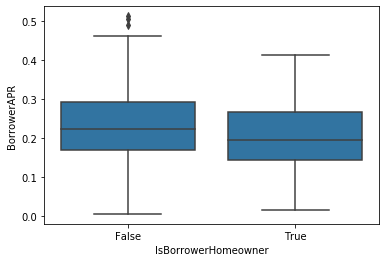

In [131]:
sb.boxplot(data = df, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',color = base_color)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

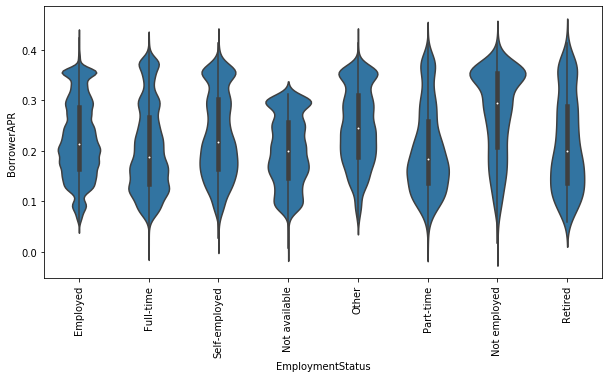

In [146]:
plt.figure(figsize = [10,5])
sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR',color = base_color, order = df['EmploymentStatus'].value_counts().index)
plt.xticks(rotation = 90)

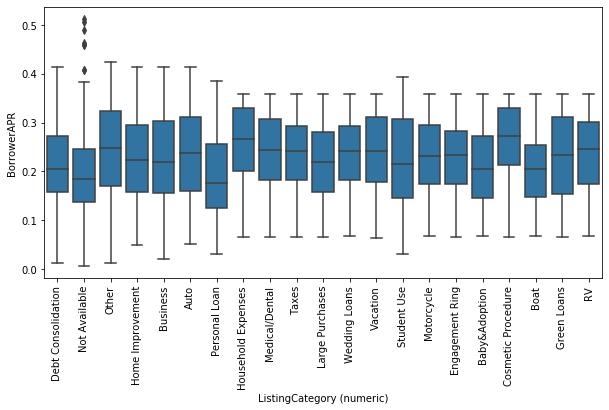

In [145]:
plt.figure(figsize = [10,5])
sb.boxplot(data = df, x = 'ListingCategory (numeric)', y = 'BorrowerAPR',
           color = base_color,order = df['ListingCategory (numeric)'].value_counts().index)
plt.xticks(rotation = 90);


(array([1.0000e+00, 1.7000e+01, 4.0000e+00, 1.2000e+01, 1.1000e+01,
        3.2000e+01, 6.0000e+00, 4.2000e+01, 2.4000e+01, 2.6000e+01,
        2.8000e+01, 4.7000e+01, 1.0700e+02, 3.7700e+02, 2.7050e+03,
        4.4810e+03, 8.4700e+03, 1.1489e+04, 1.2670e+04, 7.9430e+03,
        8.8510e+03, 8.3510e+03, 7.8430e+03, 2.9400e+03, 4.9500e+03,
        2.2260e+03, 4.2900e+02, 5.2100e+02, 1.0800e+02, 4.1000e+01,
        2.9000e+01, 9.0000e+00, 2.5000e+01, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.00000000e-01, -9.00000000e-02, -8.00000000e-02, -7.00000000e-02,
        -6.00000000e-02, -5.00000000e-02, -4.00000000e-02, -3.00000000e-02,
        -2.00000000e-02, -1.00000000e-02, -5.55111512e-17,  1.00000000e-02,
         2.00000000e-02,  3.00000000e-02,  4.00000000e-02,  5.00000000e-02,
         6.00000000e-02,  7.00000000e-02,  8.00000000e-02,  9.00000000e-02,
         1.00000000e-01,  1.10000000e-01,  1.20000000e-01,  1.30000000e-01,
         1

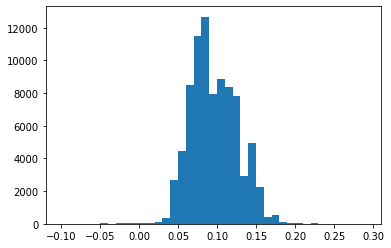

In [172]:
bins = np.arange(-0.1,df.EstimatedReturn.max()+0.01,0.01)
plt.hist(data = df, x = 'EstimatedReturn',bins = bins)

In [175]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

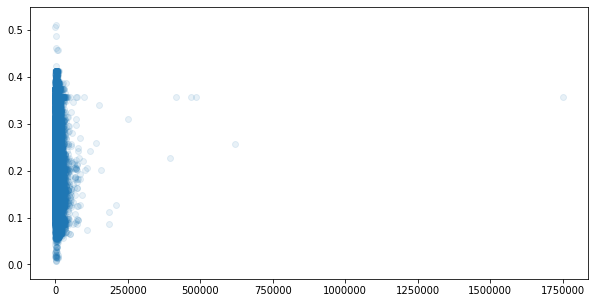

In [193]:
plt.figure(figsize=[10, 5])
plt.scatter(data = df, x ='StatedMonthlyIncome' , y = 'BorrowerAPR',alpha = 0.1)

In [208]:
df.TotalInquiries.value_counts()

2.0      14887
3.0      13934
1.0      13785
4.0      12148
5.0      10098
         ...  
95.0         1
69.0         1
83.0         1
117.0        1
89.0         1
Name: TotalInquiries, Length: 102, dtype: int64

(-0.5, 20)

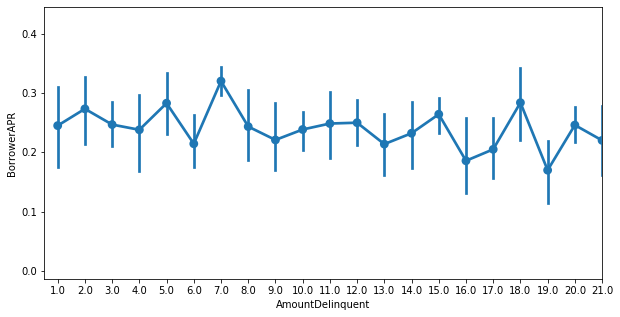

In [219]:
bins = [0,2,5,10,20,50,100,200,500,1000]
plt.figure(figsize=[10, 5])
sb.pointplot(data = df[df.AmountDelinquent != 0], x = 'AmountDelinquent', y = 'BorrowerAPR', alpha = 1)
plt.xlim(-0.5,20)


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!